<a href="https://colab.research.google.com/github/DQN-Labs/school-cheating-ai-using-cv/blob/main/school_Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation, Dropout, Flatten, Dense



2024-10-22 16:12:31.077065: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-22 16:12:35.235366: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-22 16:12:35.472636: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-22 16:12:35.832055: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-22 16:12:35.930070: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-22 16:12:36.570547: I tensorflow/core/platform/cpu_feature_gu

In [2]:
#conv layers
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape = (150,150,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))




/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
#fully connected layers
model.add(Flatten())

model.add(Dense( activation = 'relu', units=64))
model.add(Dense( activation = 'softmax', units=2))



In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,183,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,259,586 (4.80 MB)

 Trainable params: 1,259,586 (4.80 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_set = train_datagen.flow_from_directory(
        'data',
        target_size=(150, 150),
        class_mode='categorical')

Found 1030 images belonging to 2 classes.


In [8]:
test_set = test_datagen.flow_from_directory(
        'data',
        target_size=(150, 150),
        class_mode='categorical')

Found 1030 images belonging to 2 classes.


In [9]:
model.fit(train_set,epochs=10,validation_data=test_set)


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


2024-10-22 16:13:09.747789: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 179437568 exceeds 10% of free system memory.
2024-10-22 16:13:10.986030: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44859392 exceeds 10% of free system memory.
2024-10-22 16:13:11.057731: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42467328 exceeds 10% of free system memory.
2024-10-22 16:13:11.700797: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 29297664 exceeds 10% of free system memory.
2024-10-22 16:13:11.836543: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21233664 exceeds 10% of free system memory.


33/33 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.8800 - loss: 0.4232 - val_accuracy: 0.8670 - val_loss: 0.2853
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.8932 - loss: 0.2546 - val_accuracy: 0.9320 - val_loss: 0.1760
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9301 - loss: 0.1610 - val_accuracy: 0.9641 - val_loss: 0.1220
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9737 - loss: 0.0854 - val_accuracy: 0.9670 - val_loss: 0.0865
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9808 - loss: 0.0664 - val_accuracy: 0.9942 - val_loss: 0.0196
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9910 - loss: 0.0224 - val_accuracy: 0.9961 - val_loss: 0.0088
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9921 - loss: 0.0122 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9981 - loss: 0.0056 - val_accuracy: 0.9981 - val_loss: 0.0076
Epo

In [13]:
model.save("version_0-3.keras")

In [14]:
import keras
keras.saving.load_model("version_0-3.keras")

<Sequential name=sequential, built=True>

In [15]:
train_set.class_indices

{'class_0': 0, 'class_1': 1}

In [16]:
## prediction of single new data
import numpy as np
from tensorflow.keras.preprocessing import image
test_image= image.load_img('/workspaces/school-cheating-ai-using-cv/data/class_0/7c6a709b-3ff1-414c-bb20-3021e19d1ffe_169_jpg.rf.5ae020c13b579fda66789494d5e253a3.jpg' ,target_size =(150,150))


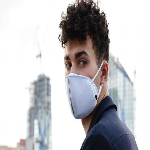

In [17]:
test_image

In [18]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [19]:
test_image.shape

(150, 150, 3)

In [20]:
test_image=test_image.reshape(1,150, 150, 3)

In [21]:
## For single prediction change the dimension using axis. To remove problem of batch
#test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [22]:
print(result)
np.around(result)
result=result.argmax()

if result == 0:
    prediction = 'not cheat'
elif result == 1:
    prediction = 'cheat'
else:
    prediction = 'unknown'

print(prediction)

[[1. 0.]]
not cheat


In [12]:
## Class label of dog and cat

if result == 0:
    prediction = 'not cheat'
elif result == 1:
    prediction = 'cheat'
else:
    prediction = 'unknown'


NameError: name 'result' is not defined

In [119]:
prediction

'cheat'

In [46]:
model.save("model_1.keras")